# Exam Statistical Modeling

**Author:** Axel Manguy
**Due date:** 14/10/2018

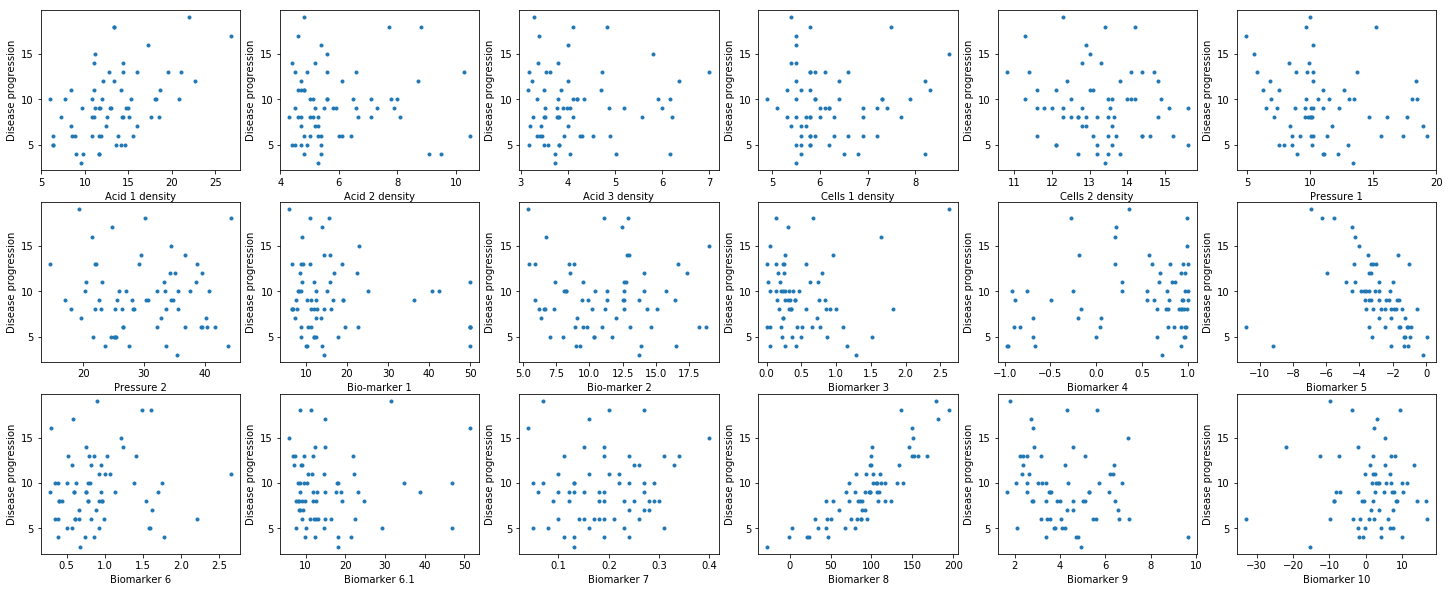

In [1]:
%matplotlib inline
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing


dataframe=pandas.read_csv("./MedicalData1.csv",sep=';',decimal=b',')

listColNames=list(dataframe.columns)


XY=dataframe.values
ColNb_Y=listColNames.index('Disease progression')


Y=XY[:,ColNb_Y].reshape((XY.shape[0],1))   #reshape is to make sure that Y is a column vector
X = np.delete(XY, ColNb_Y, 1)

X_scaled = preprocessing.scale(X)

listColNames.pop(ColNb_Y)     #to make it contains the column names of X only

fig,axes = plt.subplots(3, 6, figsize=(25, 10))
for ax,Col in zip(axes.ravel(), range(len(listColNames))):
    ax.plot(X[:,Col],Y[:],'.')
    ax.set_xlabel(listColNames[Col])
    ax.set_ylabel('Disease progression')
plt.show()

## QUESTION 1 : 
 <font color='SteelBlue'>Observez les donnees unes par unes. Est-ce que vous identifiez visuellement des liens entre 
certaines variables et la variable 'Disease progression'. Si oui, lesquels ?</font>

D'un point de vue strictement visuel la plupart des variables ne semble pas avoir de lien évident avec 'Disease Progression' à l'exception de la variable 'Biomarker 8'. On se propose de regarder les coefficients de corrélation (Pearson et Spearman) pour s'en convaincre et se donner une première idée des pistes intéressantes. Sur le graphe ci-dessous sont affiché les valeurs absolues de ces coefficients, dans la mesure où l'on est intéressé par une corrélation qu'elle soit positive ou négative. Trois variables semblent présenter un intérêt particulier : 'Biomarker 8', 'Biomarker 5' ainsi que 'Acid density'. 

La suite de cette étude visera à proposer des modèles de régressions en s'intéressant plus particulièrement à ces 3 variables et en essayant plusieurs méthodes différentes

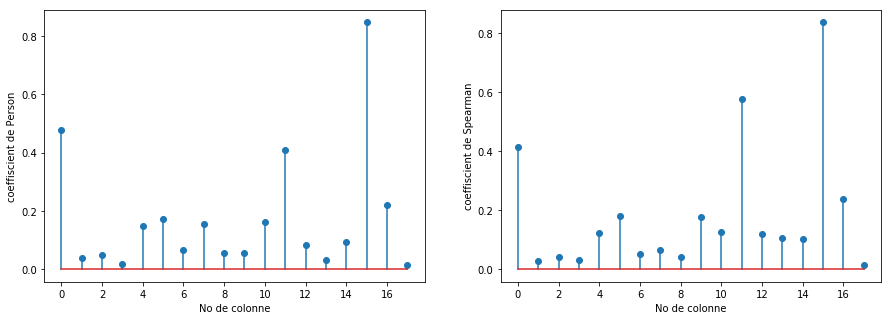

In [2]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import spearmanr
p_lst=[]
s_lst=[]
for Col in range(len(listColNames)):
    pearson,_=pearsonr(X[:,Col],Y[:].T[0])
    spearman,_=spearmanr(X[:,Col],Y[:].T[0])
    #print(listColNames[Col]+':\n pearson: '+str(round(pearson,2))+' , spearman: '+str(round(spearman,2)))
    p_lst.append(pearson)
    s_lst.append(spearman)

fig,axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].stem(np.abs(p_lst))
axes[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[0].set_xlabel('No de colonne')
axes[0].set_ylabel('coeffiscient de Person')
axes[1].stem(np.abs(s_lst))
axes[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[1].set_xlabel('No de colonne')
axes[1].set_ylabel('coeffiscient de Spearman')

plt.show()

## QUESTION 2 : 
 <font color='SteelBlue'>On se demande si il est possible de predire le niveau de 'Disease progression' à partir de de la variable 'Acid 1 density'. </font>


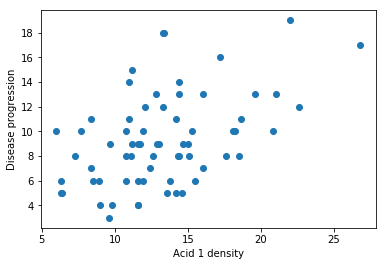

In [3]:
plt.scatter(X[:,0],Y[:])
plt.xlabel(listColNames[0])
plt.ylabel('Disease progression')
plt.show()

### QUESTION 2.1 : 
 <font color='SteelBlue'>Effectuez une regression lineaire simple entre ces deux variables et predisez ensuite les valeurs de 'Disease progression' a l'aide de 'Acid 1 density'. 

Vous pourrez evaluer la qualité des predictions a l'aide du coefficient de determination R2.</font>

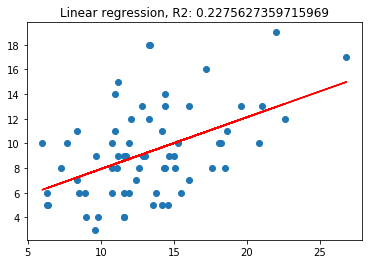

In [4]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
x=X[:,0]
lr.fit(x[:,np.newaxis], Y[:])
plt.scatter(X[:,0],Y[:])
plt.plot(x, lr.predict(x[:,np.newaxis]), 'r')
plt.title('Linear regression, R2: '+str(lr.score(x[:,np.newaxis], Y[:])))
plt.show()

### QUESTION 2.2 : 
 <font color='SteelBlue'>Evaluez la stabilite des predictions a l'aide d'une methode de validation croisee de type 4-folds.</font>
 
Avec une validation croisée on s'aperçoit que le coefficient R2 est loin d'être constant. Le modèle parait peu fiable et pourrait etre sensible à un apport de nouvelles données. On se propose donc de trouver une variable plus pertinente.

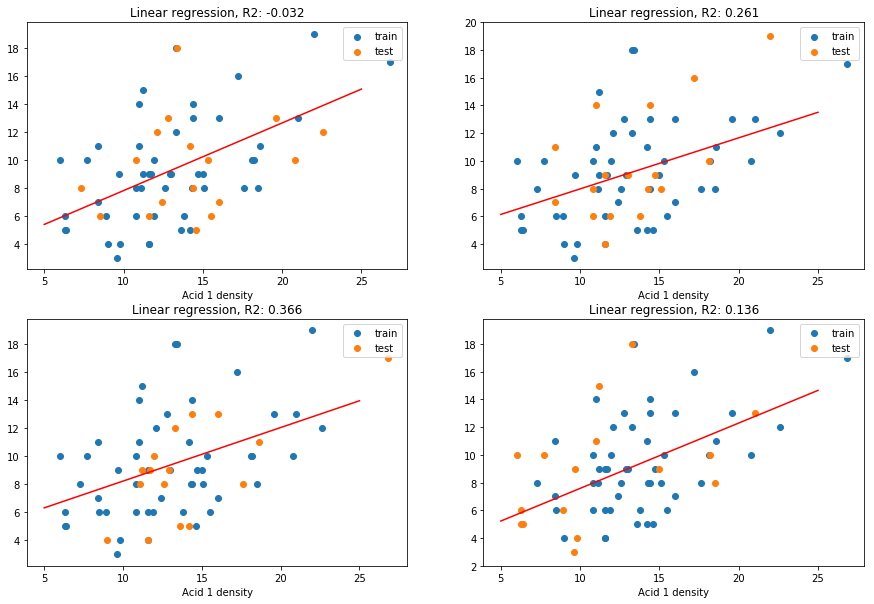

In [5]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=4)
i=0
x=X[:,0] #0 pour la 1er colonne
fig,axes = plt.subplots(2, 2, figsize=(15, 10))
for ax, (train, test) in zip(axes.ravel(),kf.split(X)):
    #Train and Test datasets
    x_train=x[train,np.newaxis]
    y_train=Y[train]
    x_test=x[test,np.newaxis]
    y_test=Y[test]
    
    #Linear regression instantiation
    lr = LinearRegression()
    #fit and scoring
    lr.fit(x_train, y_train)
    r2=lr.score(x_test, y_test)
    
    #plotting
    ax.scatter(x_train,y_train.T,label='train')
    ax.scatter(x_test,y_test.T,label='test')
    ax.set_xlabel(listColNames[0])
    ax.plot(np.linspace(5,25), lr.predict(np.linspace(5,25).reshape(-1, 1)), 'r')
    ax.set_title('Linear regression, R2: '+str(round(r2,3)))
    ax.legend()
plt.show()

### QUESTION 2.3 : 
 <font color='SteelBlue'>Auriez-vous eu de meilleurs resultats en predisant 'Disease progression' a l'aide de la variable 'Biomarker 8' ou 'Pressure 1'?</font>
 
En évaluant l'une et l'autre des variables, 'Biomarker 8' semble être la plus intéressante. On effectue donc une validation croisée comme précédemment pour vérifier la stabilité du modèle. 2 séries de graphes sont proposés pour répondre à cette question. Le premier est une comparaison entre 2 régressions linéaires simples, le second est une représentation de chacune des itérations du 4-Fold avec le coefficient de détermination R2 associé.  

Si le score R2 varie entre les quatre séries, il reste néanmoins satisfaisant et certainement plus stable que le modèle précédent.

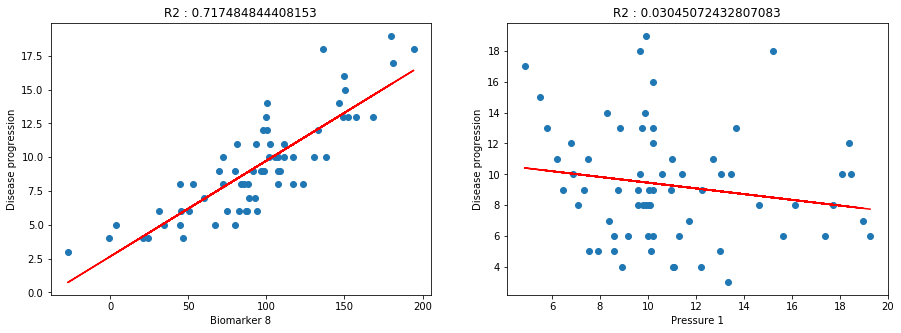

In [6]:
fig,axes = plt.subplots(1, 2, figsize=(15, 5))
#Regression Lineraire sur Biomarker8
axes[0].scatter(X[:,15],Y[:])
axes[0].set_xlabel(listColNames[15])
axes[0].set_ylabel('Disease progression')
lr0 = LinearRegression()
x=X[:,15]
lr0.fit(x[:,np.newaxis], Y[:])
axes[0].plot(x, lr0.predict(x[:,np.newaxis]), 'r')
axes[0].set_title("R2 : "+str(lr0.score(x[:,np.newaxis], Y[:])))


#Regression Lineraire sur Pressure1
axes[1].scatter(X[:,5],Y[:])
axes[1].set_xlabel(listColNames[5])
axes[1].set_ylabel('Disease progression')
lr1 = LinearRegression()
x=X[:,5]
lr1.fit(x[:,np.newaxis], Y[:])
axes[1].plot(x, lr1.predict(x[:,np.newaxis]), 'r')
axes[1].set_title("R2 : "+str(lr1.score(x[:,np.newaxis], Y[:])))

plt.show()

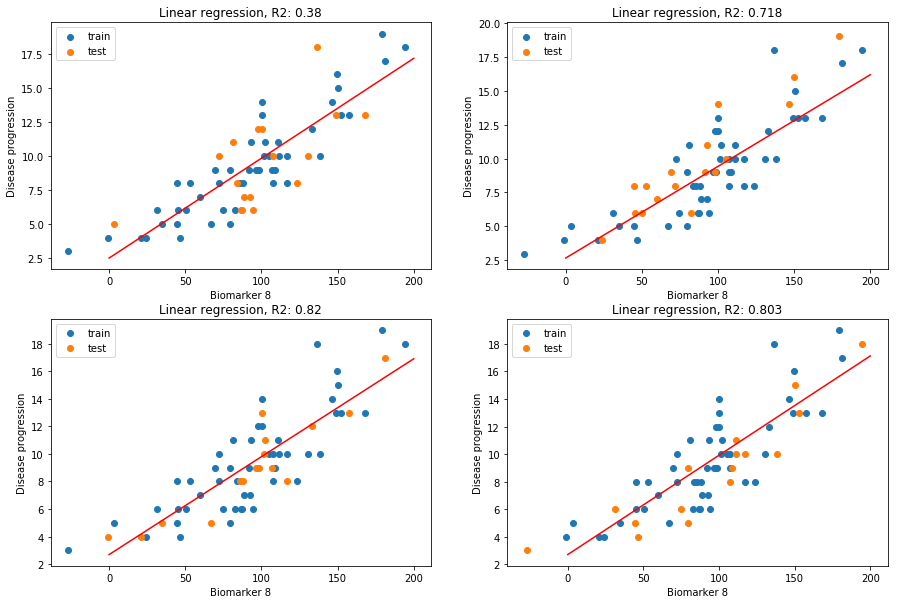

In [7]:
x=X[:,15] #0 pour la 15e colonne
fig,axes = plt.subplots(2, 2, figsize=(15, 10))
for ax, (train, test) in zip(axes.ravel(),kf.split(x)):
    #Train and Test datasets
    x_train=x[train,np.newaxis]
    y_train=Y[train]
    x_test=x[test,np.newaxis]
    y_test=Y[test]
    
    #Linear regression instantiation
    lr = LinearRegression()
    #fit and scoring
    lr.fit(x_train, y_train)
    r2=lr.score(x_test, y_test)
    
    #plotting
    ax.scatter(x_train,y_train.T,label='train')
    ax.scatter(x_test,y_test.T,label='test')
    ax.set_xlabel(listColNames[15])
    ax.set_ylabel('Disease progression')
    ax.plot(np.linspace(0,200), lr.predict(np.linspace(0,200).reshape(-1, 1)), 'r')
    ax.set_title('Linear regression, R2: '+str(round(r2,3)))
    ax.legend()
plt.show()

### QUESTION 2.4 : 
 <font color='SteelBlue'>Peut-on enfin dire si on observe une relation significative entre 'Disease progression'et (independament) 'Acid 1 density' ou 'Biomarker 8' ou 'Pressure 1'?

On peut le valider  en testant si les coefficients des pentes obtenues entre 'Disease progression' et chacune de ses trois variables par regression lineaire simples sont significativement differentes de 0.</font>

In [8]:
colomns={'Acid 1 density':0,'Biomarker 8':15,'Pressure 1':5}
for colnames,col in colomns.items():
    x=X[:,col]
    lr = LinearRegression()
    lr.fit(x[:,np.newaxis], Y[:])
    print(colnames+" :  coef="+str(lr.coef_[0,0]))

Acid 1 density :  coef=0.42034504018567687
Biomarker 8 :  coef=0.07088966912622757
Pressure 1 :  coef=-0.18557425551922296


## QUESTION 3 :   
 <font color='SteelBlue'>On s'interesse maintenant au lien entre la variable 'Disease progression' et 'Biomarker 5'.
On peut remarquer que ces donnees contiennent deux valeurs aberrantes.</font>

### QUESTION 3.1 : 
 <font color='SteelBlue'>Quelles sont les valeurs aberrantes et quel va etre leur impact lors de l'estimation d'une relation lineaire entre ces deux variables ?</font>
 
D'un point de vue purement visuel, il semble y avoir deux valeurs aberrantes avec une valeur inférieure à -8 (en bleu sur le graphe ci dessous). On constate en effet un changement important dans l'allure de la régression selon si l'on conserve ou non ces deux valeurs. On se propose de retrouver ces deux valeurs par des méthodes de détection avant d'évaluer à nouveaux la régression et de constater leur impact.

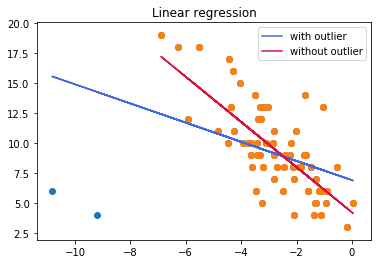

In [9]:
lr = LinearRegression()
lr_moins = LinearRegression()
x=X[:,11]
x_moins=x[x>-8]
Y_moins=Y[x>-8]
lr.fit(x[:,np.newaxis], Y[:])
lr_moins.fit(x_moins[:,np.newaxis], Y_moins[:])
plt.scatter(X[:,11],Y[:])
plt.scatter(x_moins,Y_moins)
plt.plot(x, lr.predict(x[:,np.newaxis]), color='royalblue', label='with outlier')
plt.plot(x_moins, lr_moins.predict(x_moins[:,np.newaxis]), 'crimson', label='without outlier')
plt.title('Linear regression')
plt.legend()
plt.show()

### QUESTION 3.2 :
 <font color='SteelBlue'>Definissez une procedure de detection automatique de ces variables basee sur la distance de Cook.</font>

En calculant la distance de Cook, deux valeurs semblent se distinguer particulièrement. Afin d'être invariant aux effets d'échelles on se propose de travailler sur une distance de Cook centrée-réduite de sorte à ce que la procédure de détection puisse fonctionner aussi bien sur 'biomarker 5' que sur les autres variables. En effet, ce n'est pas tant la distance en elle-même qui nous intéresse que de trouver des observations ayant une distance anormale vis à vis du reste de la population. On fixe alors à un le seuil au-delà duquel les observations seront considérées comme aberrantes, ce seuil pouvant être affiné en étudiant son efficacité sur les autres variables.

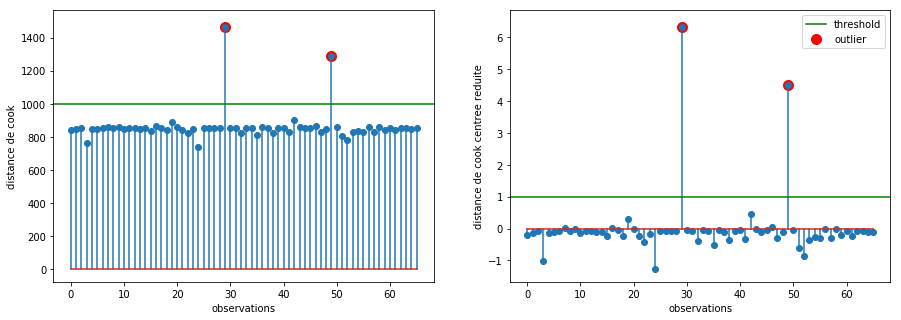

In [10]:
def cook_distance(x,y):
    #La fonction cook_distance calcule la distance de cook pour chaque observation i
    #prends en entree les variables x et y et returne une liste de distance de taille len(x)
    
    dist=[]
    n=len(x)
    #regression et estimation
    lr.fit(x[:, np.newaxis], y)
    y_estime=lr.predict(x[:, np.newaxis])
    e=y-lr.predict(x[:, np.newaxis])#Residus
    s2=(1/(n-2))*np.sum(e**2)#variance residuelle
    for i in range(n):
        x_del=np.delete(x,i)
        y_del=np.delete(y,i)
        #nouveaux fit pour l'estimation des y sans l'observation i
        lr.fit(x_del[:, np.newaxis], y_del)
        #y estimé - y estimé sans i
        ei=y_estime-lr.predict(x[:, np.newaxis])
        #distance de cook
        dist.append(np.sum(ei**2)/(2*s2))
    return dist

def outlier_detection(x,y,seuil=1):
    #la fonction outlier_detection renvoie une liste d'indices
    #correspondant aux valeurs detectées comme aberrantes
    cook=cook_distance(x,Y)
    cook_cr=(cook-np.mean(cook))/np.std(cook)
    indices=np.arange(0,len(x))
    return indices[cook_cr>seuil]
    
#affichage
x=X[:,11]
fig,axes = plt.subplots(1, 2, figsize=(15, 5))
#detection
outliers=outlier_detection(x,Y)
#distance de cook
cook=np.array(cook_distance(x,Y))
axes[0].stem(cook)
axes[0].scatter(outliers,cook[outliers],c='r',s=100)
axes[0].set_xlabel('observations')
axes[0].set_ylabel('distance de cook')
axes[0].axhline(y=1000,c='g',label='threshold')

#distance de cook centree reduite
cook_cr=(cook-np.mean(cook))/np.std(cook)
axes[1].stem(cook_cr)
axes[1].scatter(outliers,cook_cr[outliers],c='r',s=100,label='outlier')
axes[1].set_xlabel('observations')
axes[1].set_ylabel('distance de cook centree reduite')
axes[1].axhline(y=1,c='g',label='threshold')
plt.legend()
plt.show()

### QUESTION 3.3 : 
 <font color='SteelBlue'>Pourriez vous plus simplement detecter ces observations aberrantes a l'aide des residus ? Si oui, decrivez comment, sans necessairement coder la solution.</font>
 
Comme précédemment on retire une observation $i$ à la fois afin d'évaluer l'influence qu'elles ont sur le résultat. On s'aperçoit que lorsque les valeurs aberrantes sont retirées, l'erreur (moyenne des écarts au carré) augmente d'avantage que pour les autres valeurs. Une méthode de détection fondée sur le même principe que précédemment consiste à définir un seuil au-delà duquel les valeurs seront considérées comme aberrantes. A la différence de la distance de Cook on évalue ici l'influence d'une observation sur l'erreur produite par le modèle. 

En travaillant sur des variables centrées réduite, les résultats sont identiques 

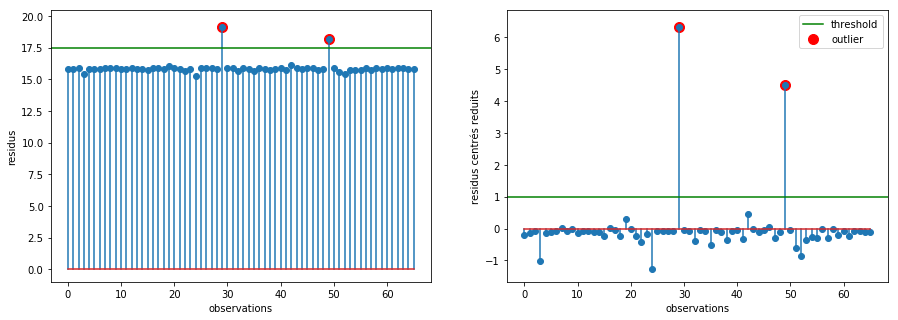

In [11]:
def residual(x,y):
    #La fonction residual calcul les residu i
    err=[]
    n=len(x)
    lr=LinearRegression()
    for i in range(n):
        x_del=np.delete(x,i)
        y_del=np.delete(y,i)
        #nouveaux fit pour l'estimation des y sans l'observation i
        lr.fit(x_del[:, np.newaxis], y_del)
        #y - y estimé sans i
        ei=y-lr.predict(x[:, np.newaxis])
        err.append(np.mean(ei**2))
    return err

def outlier_detection_res(x,y,seuil=1):
    #la fonction outlier_detection renvoie une liste d'indices
    #correspondant aux valeurs detectées comme aberrantes
    err=residual(x,Y)
    err_cr=(err-np.mean(err))/np.std(err)
    indices=np.arange(0,len(x))
    return indices[err_cr>seuil]


#affichage
x=X[:,11]
fig,axes = plt.subplots(1, 2, figsize=(15, 5))
#detection
outliers=outlier_detection_res(x,Y)
#distance de cook
err=np.array(residual(x,Y))
axes[0].stem(err)
axes[0].scatter(outliers,err[outliers],c='r',s=100)
axes[0].set_xlabel('observations')
axes[0].set_ylabel('residus')
axes[0].axhline(y=17.5,c='g',label='threshold')

#distance de cook centree reduite
err_cr=(err-np.mean(err))/np.std(err)
axes[1].stem(err_cr)
axes[1].scatter(outliers,err_cr[outliers],c='r',s=100,label='outlier')
axes[1].set_xlabel('observations')
axes[1].set_ylabel('residus centrés reduits')
axes[1].axhline(y=1,c='g',label='threshold')
plt.legend()
plt.show()

### QUESTION 3.4 : 
 <font color='SteelBlue'>Comment traiteriez-vous les donnees aberrantes dans le contexte de la regression lineaire entre 'Disease progression' et 'Biomarker 5' pour estimer un lien pertinent entre ces deux variables</font>
 
Compte tenu du nombre d'observations et du nombre d'outlier détectés (ici deux), supprimer ces variables ne semble pas être une solution déraisonnable. Une autre solution possible aurait été de construire une estimation en norme L1 plus robuste et à meme d'etre performante malgrés ces valeurs.

En supprimant les valeurs aberrantes, le modèle produit en effet un score R2 satisfaisant.

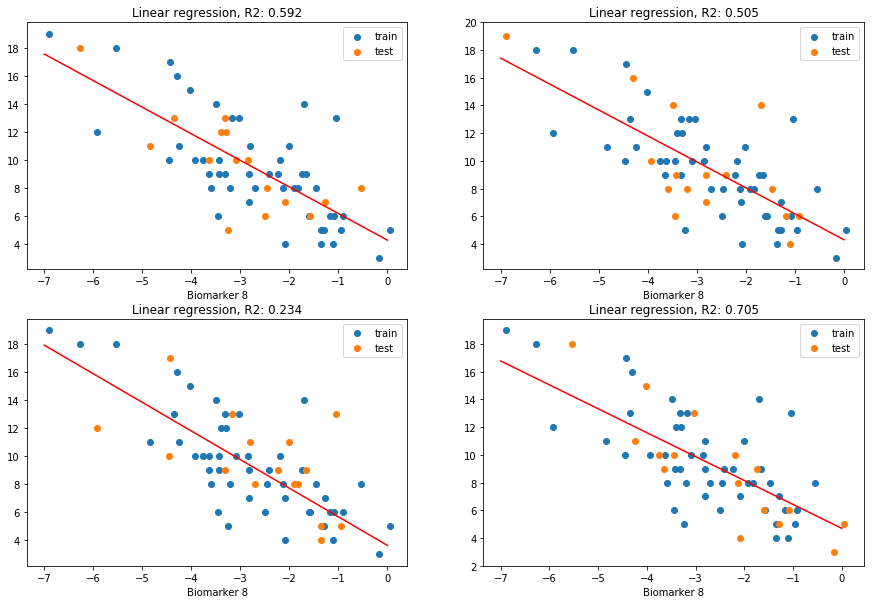

In [12]:
x=np.array(X[:,11])
outliers=outlier_detection(x,Y)
x_removed=np.delete(x,outliers)
y_removed=np.delete(Y,outliers)

fig,axes = plt.subplots(2, 2, figsize=(15, 10))
for ax, (train, test) in zip(axes.ravel(),kf.split(x_removed)):
    #Train and Test datasets
    x_train=x_removed[train,np.newaxis]
    y_train=y_removed[train]
    x_test=x_removed[test,np.newaxis]
    y_test=y_removed[test]
    
    #Linear regression instantiation
    lr = LinearRegression()
    #fit and scoring
    lr.fit(x_train, y_train)
    r2=lr.score(x_test, y_test)
    
    #plotting
    ax.scatter(x_train,y_train.T,label='train')
    ax.scatter(x_test,y_test.T,label='test')
    ax.set_xlabel(listColNames[15])
    ax.plot(np.linspace(-7,0), lr.predict(np.linspace(-7,0).reshape(-1, 1)), 'r')
    ax.set_title('Linear regression, R2: '+str(round(r2,3)))
    ax.legend()
plt.show()

## QUESTION 4 :   
 <font color='SteelBlue'>Une fois les observations aberrantes de 'Biomarker 5' traitees, on souhaite selectionner les variables de 'X' qui permettent de prédire au mieux 'Disease progression' a l'aide de la regression multiple regularisee.</font>

### QUESTION 4.1 : 
 <font color='SteelBlue'>
Expliquez pourquoi vous effecturez cette procedure sur 'X_scaled' plutot que 'X' ?</font>

Les variables de 'X' ne sont pas exprimées dans les mêmes mesures et ne sont donc pas, en l'état, comparables entre elles. L'opération de 'scaling' correspond à centrer-reduire les variables de sortes qu'elles aient une moyenne nulle et une variance unitaire. En effet, si une variable a une variance dont l'ordre de grandeur est plus important que les autres elle pourrait avoir un effet disproportionné dans la manière dont la régularisation sélectionne les variables et l'empêcher d'atteindre un objectif satisfaisant. En ce qui concerne les modèles qui nous intéressent ici, centrer-réduire est une condition à l'application de la régularisation tant L1 que L2. A cet égard, que l'on implémente une régularisation RIDGE (L2), Lasso(L1) ou ElasticNet(L1 et L2) il sera nécessaire d'effectuer cette opération.

### QUESTION 4.2 : 
 <font color='SteelBlue'>Expliquez pourquoi vous regulariserez les coefficients estimes avec une regularisation de type LASSO plutot que RIDGE ?</font>
 
La régression RIDGE ne permet pas une sélection, ce type de régularisation conserve en effet l'ensemble des variables. Or ici certaines variables (plus de la majorité) ne sont pas pertinentes pour modéliser l'évolution de la maladie. L'approche Lasso va permettre de pénaliser certaines variables (pénalisation L1) moins pertinentes pour la régression.

### QUESTION 4.3 :
 <font color='SteelBlue'>Codez la procedure de selection des variables optimales en parametrant a la main le poids entre la qualite de prediction et le niveau de regularisation</font>

Parmi [0.001, 0.01, 0.1, 1 et 10], le maximum semble être entre $\alpha = 0$ et $\alpha = 2$

On cherche alors une valeur de $\alpha$ dans cet intervalle par pas de 0.01.
Une bonne valeur semble être $\alpha = 0.81$. Les paramètres et résultats du modèle sont ensuite affichés pour cette valeur. On constate que six variables sont sélectionnées avec un poids plus important pour 'Acid 1 density' et 'biomarker 8'. Nous avions déjà identifié 'Biomarker 8' comme l'une des variables les plus intéressantes et la régularisation de Ridge semble confirmer ce résultat.

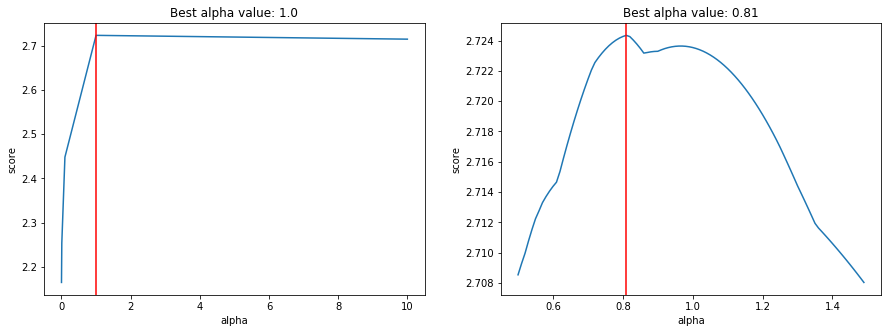

In [13]:
from sklearn.linear_model import Lasso
kf = KFold(n_splits=4)
#definition des espaces de recherche
ranges=[[0.001,0.01,0.1,1.,10.],
       np.arange(0.5,1.5,0.01)]
#subplots et taille de figures
fig,axes = plt.subplots(1, 2, figsize=(15, 5))
for ax,alpha_range in zip(axes.ravel(),ranges):
    #boucle sur les 2 espaces definis plus haut et sur les graphes
    scores=[]
    for alpha in alpha_range:
        #recherche parmis les alphas
        alpha=round(alpha,3)
        score_sum=0
        #validation croisee par 4-fold
        for train, test in kf.split(X):
            X_train=X[train,:]
            y_train=Y[train,:]
            X_test=X[test,:]
            y_test=Y[test,:]
            #regression
            lasso_regressor = Lasso(alpha=alpha)
            lasso_regressor.fit(X_train, y_train)
            #prediction et score r2
            y_pred_lasso = lasso_regressor.predict(X_test)
            score_lasso = lasso_regressor.score(X_test, y_test)
            score_sum+=score_lasso
        scores.append(score_sum)
        
    #affichage    
    ax.plot(alpha_range,scores)
    ax.axvline(alpha_range[np.argmax(scores)],c='r')
    ax.set_title('Best alpha value: '+str(round(alpha_range[np.argmax(scores)],3)))
    ax.set_xlabel('alpha')
    ax.set_ylabel('score')

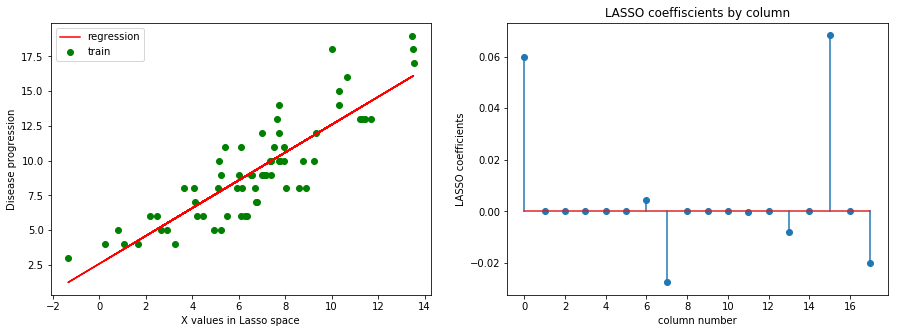

lasso regressor sparse coef
  (0, 0)	0.06001202150170118
  (0, 6)	0.004388959711070031
  (0, 7)	-0.027579412385232552
  (0, 11)	-0.0003120478314389726
  (0, 13)	-0.007881838137409562
  (0, 15)	0.06824464715938691
  (0, 17)	-0.020109560949163448


In [14]:
# regression lineaire avec regularisation Lasso ...
import matplotlib.ticker as ticker
from sklearn.linear_model import Lasso

#regression
alpha = 0.81
lasso_regressor = Lasso(alpha=alpha)
lasso_regressor.fit(X, Y)
fig,axes = plt.subplots(1, 2, figsize=(15, 5))

#Plotting
axes[0].scatter(np.dot(lasso_regressor.coef_,X.T),Y.T,label='train',c='g')
axes[0].plot(np.dot(lasso_regressor.coef_,X.T), lasso_regressor.predict(X), c='r',label='regression')
axes[0].set_xlabel('X values in Lasso space')
axes[0].set_ylabel('Disease progression')
axes[0].legend()

axes[1].stem(lasso_regressor.coef_)
axes[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[1].set_title('LASSO coeffiscients by column')
axes[1].set_xlabel('column number')
axes[1].set_ylabel('LASSO coefficients')
plt.show()
print('lasso regressor sparse coef')
print(lasso_regressor.sparse_coef_)

### QUESTION 4.4 :
 <font color='SteelBlue'>Codez la procedure automatique de parametrisation de ce poids, de sorte a ce q'un maximum de trois variables soit typiquement selectionne et que la qualite de prediction soit optimale. Une procédure de validation croisee de type leave-one-out sera idealement utilisee. La selection des variables est-elle stable ?</font>
 
On considère ce problème comme la recherche du meilleur $\alpha$ possible sous la contrainte d'un nombre de variable maximum à sélectionner. Il est à noter que ces 2 contraintes (meilleurs $\alpha$ et 3 variables) ne coïncident pas nécessairement. Il est ainsi envisageable que le meilleur $\alpha$ ne sélectionne pas exactement les n variables demandés. Aussi la fonction écrite propose les 2 résultats celui sous contrainte du nombre de variables et celui libéré de cette contrainte simplement à titre indicatif. 

L'implémentation retenue pour la résolution de ce problème est celle d'une fonction récursive recherchant l'optimum dans des espaces de recherche de plus en plus réduit. L'intervalle de recherche est défini comme : 

$I=[\alpha_{best}.(1-e), \alpha_{best}.(1+e)]$ avec $e = 1/{2}^{n}$ où $n$ est le nombre d'appel de la fonction

Il est à noter que la validation croisée de type leave-one-out n'a pas pu être implémentée, le score étant toujours nul. La solution actuelle repose donc sur une validation croisée 4-Fold. A chaque appel, la fonction réalise ainsi 4 régressions Lasso pour chaque valeur de alpha présente dans l'intervalle de recherche. 

A l'issue de ces $4k$ Régressions un meilleur alpha possible est identifié au sein de l'intervalle. Si cet alpha est identique à celui identifié à l'appel récursif précèdent la récursion s'arrête. On propose alors le meilleur alpha répondant au critère des n variables sélectionnées (ici 3). On considère qu'une variable est sélectionnée par la régression lorsque son coefficient est diffèrent de 0 à $10^{-3}$ près. On considère également le meilleur alpha au sens du coefficient de détermination R2 tel que proposé dans la méthode .score(X,Y) de scikit-learn. 

Lorsque le $\alpha$ proposé n'est pas satisfaisant, un nouvel appel de récursion est réalisé sur l'intervalle $I$ tel que définit précédemment (plus restreint). 

En ce qui concerne la stabilité, la sélection des variables n'est pas parfaitement stable. On note néanmoins que les variables 7 et 15 sont systématiquement sélectionnées par la régression, ce qui montre leur intérêt et justifie leur étude dans les questions précédentes. La variable 'biomarker 8', quant à elle, est systématiquement proposée avec un coefficient important. Si l'on ne devait en sélectionner qu'une ce serait probablement la variable la plus adaptée. Ce résultat va dans le sens des résultats précédents.

In [15]:
def best_alpha(X,Y,interval,lim=1e-3,best_score=0,nb_variables_contraint=3,kfold=4,e=1):
    kf = KFold(kfold)
    #Fonction recursive retournant le meilleur alpha trouvé dans un interval
    #affichage le nombre de variable significative selectionée
    print('alpha dans: ['+str(interval[0])+','+str(interval[-1])+']'+' , meilleure score précédent: '+str(best_score))
    #la recherche se fait selon 2 axes, le score et le nombre de variable
    scores=[]
    nb_variable_lst=[]
    #sur tous les alpha present dans l'intervalle
    for k,alpha in enumerate(interval):
        score_sum=0
        #K fold sur K=4
        for train, test in kf.split(X):
            X_train=X[train,:]
            y_train=Y[train,:]
            X_test=X[test,:]
            y_test=Y[test,:]
            
            lasso_regressor = Lasso(alpha=alpha)
            lasso_regressor.fit(X_train, y_train)

            y_pred_lasso = lasso_regressor.predict(X_test)
            score_lasso = lasso_regressor.score(X_test, y_test)
            score_sum+=score_lasso
        #Affichage pour rendre compte de l'evolution de la recherche
        #ne sont affiché que les 10 premiers resultats ou un resultat tde temps a autre
        if len(interval)<10 or k%200==0:
            nb_variable=len(lasso_regressor.coef_[abs(lasso_regressor.coef_)>lim])
            print('     alpha:'+str(round(alpha,3))
                  +' , score: '+str(round(score_sum,4))+' , '
                  +str(nb_variable)+' variable(s) selectioné(s)')
        #ajout du score et du nombre de variable
        scores.append(score_sum)
        nb_variable_lst.append(len(lasso_regressor.coef_[abs(lasso_regressor.coef_)>lim]))
        
    #Fin de la recursion    
    if abs(np.max(scores)-best_score) < lim :
        #si on se trouve dans un interval dans lequel le meilleure score n'evolue pas a 1e-3
        #on selectione uniquement les alpha pour lesquel 
        #le nombre de coef significativement different de 0 vaut 3
        scores_3=np.array(scores)[np.array(nb_variable_lst)==nb_variables_contraint]
        alphas_3=np.array(interval)[np.array(nb_variable_lst)==nb_variables_contraint]
        print("\n\n-----FIN DE RECHERCHE------\n")
        print("Meilleur alpha trouvé sans nombre de variables maximum\n alpha:" 
              + str(round(interval[np.argmax(scores)],4))+" , "
              +str(nb_variable_lst[np.argmax(scores)])+' variable(s) selectioné(s)'
              +', score(somme):'+str(round(np.max(scores),4))
              +', score(moyenne):'+str(round(np.max(scores)/4,4)))
        if scores_3.size != 0:
            print("\nMeilleur alpha trouvé pour "+str(nb_variables_contraint)+" variables maximum\n alpha:" 
                  + str(round(alphas_3[np.argmax(scores_3)],4))+" , "
                  +'score(somme):'+str(round(np.max(scores_3),4))
                  +' , score(moyenne):'+str(round(np.max(scores_3)/4,4)))
        print("----------------")
        return interval[np.argmax(scores)]
    #poursuite de la recursion
    else:
        if best_score!=0:
            e=e/2
        return best_alpha(X,Y,np.arange(interval[np.argmax(scores)]*(1-e+lim),interval[np.argmax(scores)]*(1+e),1e-3),
                          lim,np.max(scores),e=e)

    
a=best_alpha(X,Y,[0.001,0.01,0.1,1.,10.])

alpha dans: [0.001,10.0] , meilleure score précédent: 0
     alpha:0.001 , score: 2.1646 , 17 variable(s) selectioné(s)
     alpha:0.01 , score: 2.2534 , 17 variable(s) selectioné(s)
     alpha:0.1 , score: 2.4481 , 14 variable(s) selectioné(s)
     alpha:1.0 , score: 2.7235 , 5 variable(s) selectioné(s)
     alpha:10.0 , score: 2.7149 , 1 variable(s) selectioné(s)
alpha dans: [0.001,1.9989999999999999] , meilleure score précédent: 2.7235434933481666
     alpha:0.001 , score: 2.1646 , 17 variable(s) selectioné(s)
     alpha:0.201 , score: 2.5956 , 10 variable(s) selectioné(s)
     alpha:0.401 , score: 2.69 , 9 variable(s) selectioné(s)
     alpha:0.601 , score: 2.7144 , 7 variable(s) selectioné(s)
     alpha:0.801 , score: 2.7243 , 6 variable(s) selectioné(s)
     alpha:1.001 , score: 2.7235 , 5 variable(s) selectioné(s)
     alpha:1.201 , score: 2.7191 , 5 variable(s) selectioné(s)
     alpha:1.401 , score: 2.7106 , 4 variable(s) selectioné(s)
     alpha:1.601 , score: 2.7044 , 4 vari

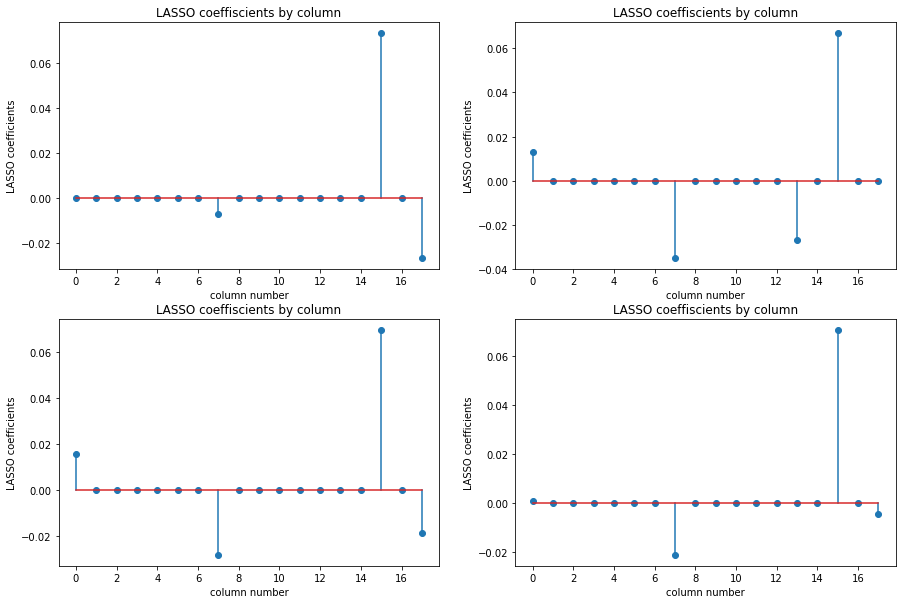

In [16]:
alpha = 1.629
kf = KFold(4)
fig,axes = plt.subplots(2, 2, figsize=(15, 10))
for ax, (train, test) in zip(axes.ravel(),kf.split(X)):
    X_train=X[train,:]
    y_train=Y[train,:]
    X_test=X[test,:]
    y_test=Y[test,:]
    
    lasso_regressor = Lasso(alpha=alpha)
    lasso_regressor.fit(X_train, y_train)

    ax.stem(lasso_regressor.coef_)
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    ax.set_title('LASSO coeffiscients by column')
    ax.set_xlabel('column number')
    ax.set_ylabel('LASSO coefficients')
plt.show()

## QUESTION 5 :  
 <font color='SteelBlue'>On s'interesse enfin au fichier 'MedicalData2.csv' et non 'MedicalData1.csv' qui contient une colonne qualitative supplementaire 'Pathology type'.</font>
 

### QUESTION 5.1 : 
 <font color='SteelBlue'>Quelles sont les differences entre les structures du fichier 'MedicalData2.csv' et du fichier 'MedicalData1.csv' en plus de cette colonne supplementaire</font>
 
Le séparateur est ',' pour les colonnes et '.' pour les décimales. Il convient donc d'en tenir compte dans l'étude.

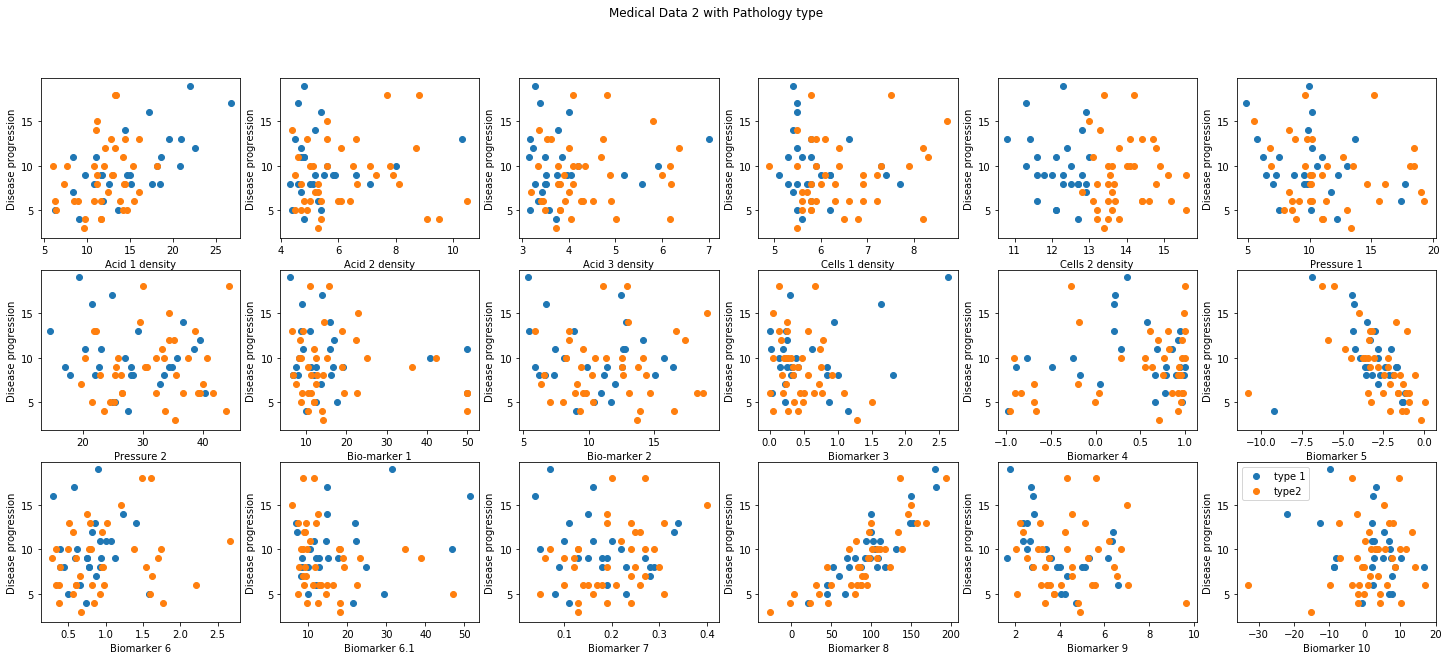

In [17]:
dataframe=pandas.read_csv("./MedicalData2.csv",sep=',',decimal=b'.')

listColNames=list(dataframe.columns)
XY=dataframe.values
ColNb_Y=listColNames.index('Disease progression')
ColNb_Y2=listColNames.index('Pathology type')

Y=np.array(XY[:,ColNb_Y].reshape((XY.shape[0],1)))  #reshape is to make sure that Y is a column vector
Y2=np.array(XY[:,ColNb_Y2].reshape((XY.shape[0],1)))
X = np.delete(XY, [ColNb_Y,ColNb_Y2], 1)
X_scaled = preprocessing.scale(X)

listColNames.pop(listColNames.index('Disease progression'))
listColNames.pop(listColNames.index('Pathology type'))  #to make it contains the column names of X only

fig,axes = plt.subplots(3, 6, figsize=(25, 10))
for ax,Col in zip(axes.ravel(), range(len(listColNames))):
    x1=np.array(X[:,Col])[Y2.T[0]==1]
    x2=np.array(X[:,Col])[Y2.T[0]==2]
    ax.scatter(x1,Y[Y2.T[0]==1],label='type 1')
    ax.scatter(x2,Y[Y2.T[0]==2],label='type2')
    ax.set_xlabel(listColNames[Col])
    ax.set_ylabel('Disease progression')
    
fig.suptitle('Medical Data 2 with Pathology type')
plt.legend()
plt.show()

### QUESTION 5.2 : 
 <font color='SteelBlue'>Est-ce qu'une variable semble bien expliquer la classe de 'Pathology type'. Quelle demarchevous semble la plus pertinente pour identifer cette variable ?</font>
 
D'un point de vue purement visuel (cf. graphe ci-dessus) la variable la plus adaptée semble être 'Cells 2 density' Entendu que la variable 'Pathology type' est un indicateur qualitatif la méthode ANOVA semble la plus adaptée pour vérifier la pertinence de cette hypothèse. Cette méthode peut être appliqué sous réserve d'indépendance des échantillons, d'une equidistribution des moyennes et d'une variance homogène au sein des groupes 

Sous réserve que les critères ci-dessus sont valides, on définit l'hypothèse nulle Ho comme : 

HO : "Les moyennes des 2 populations sont identiques" 

Les résultats de l'analyse ANOVA donnent une p-value de $3.{10}^{-15}$. Avec $\alpha = 0.05$, on a $ p-value < \alpha$. 

On rejette l'hypothèse nulle et ainsi il est raisonnable de considérer que les différences entre les moyennes sont statistiquement significatives. Au regard de la question posée on considèrera que 'Cells 2 density' est une variable explicative de 'Pathology type'


F_onewayResult(statistic=105.3639888870807, pvalue=3.730706927511688e-15)


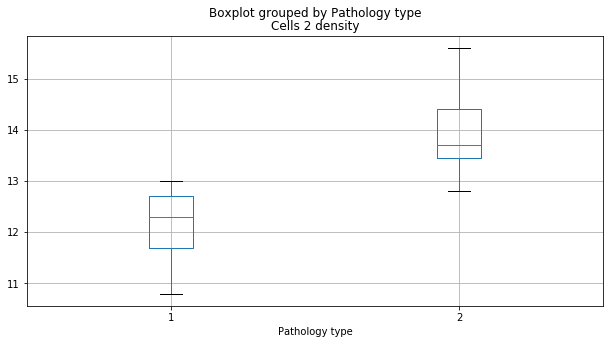

In [18]:
import pandas as pd
from scipy import stats

#representation boxplot
dataframe.boxplot('Cells 2 density', by='Pathology type', figsize=(10, 5))

df=dataframe
print(stats.f_oneway(df['Cells 2 density'][df['Pathology type'] == 1], 
             df['Cells 2 density'][df['Pathology type'] == 2]))




Les critères d'applicabilité d'ANOVA étant difficile à mettre en œuvre sur cette population, on peut chercher à vérifier les résultats en supposant que la méthode ANOVA n'était pas applicable. Une autre possibilité est alors la réalisation d'un test non paramétrique de Kruskal-Wallis. La P-value de ce test vaut $1.{10}^{-11}$. 

On a ici encore pour $\alpha = 0.05$, $p-value < \alpha$. L'hypothèse nulle est rejetée et on retrouve à nouveau le résultat précèdent. 

Il est à noter que ce test ne peut être mis en œuvre que sous réserve d'un nombre suffisant d'observation dans chaque groupe. Ici il y a plus de 5 échantillons dans chaque groupe et on considère que le test est applicable.

In [19]:
from scipy.stats import kruskal

f2vals=df['Cells 2 density'].values

kres=kruskal(f2vals[df['Pathology type'] == 1],f2vals[df['Pathology type'] == 2])

p=kres.pvalue

print(' p-value du test de Kruskal-Wallis : '+str(p))

 p-value du test de Kruskal-Wallis : 1.0551153550801504e-11
